In [1]:
import os
from pyannote.core import json

diarized_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/031622_diarized'

In [2]:
diarized = [(json.load_from(os.path.join(diarized_dir,file)), file) for file in os.listdir(diarized_dir)]

In [3]:
# don't record Victoria
# make sure background noise is off (e.g. TV, radio)
# can we somehow not record the baby?
# can we control for microphone? 

no = 0
diarized[:][:]

[(<pyannote.core.annotation.Annotation at 0x7fece84946d0>, '007.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc04acb50>, '011.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc04c5190>, '010.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc04d6250>, '006.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc04e3a90>, '001.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc03fe7f0>, '017.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc040af10>, '016.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc041ef70>, '020.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc87dd250>, '019.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc87f17c0>, '015.json'),
 (<pyannote.core.annotation.Annotation at 0x7fecc8809160>, '003.json'),
 (<pyannote.core.annotation.Annotation at 0x7feca8928fa0>, '002.json'),
 (<pyannote.core.annotation.Annotation at 0x7feca8945640>, '014.json'),
 (<pyannote.core.annotation.Annotation at 0x7feca8958b80>, '018.

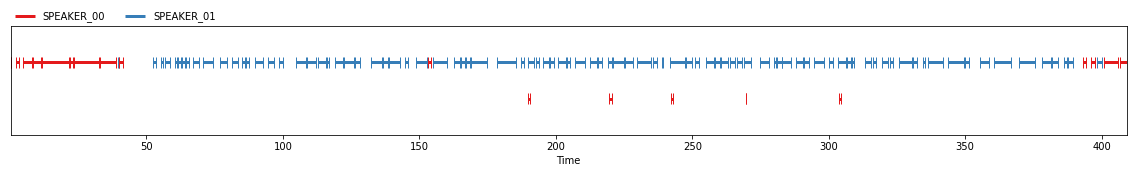

In [4]:
diarized[no][0]

In [6]:
data_clean_lower = [(data.label_timeline('SPEAKER_01'),part) for data,part in diarized if int(os.path.splitext(part)[0])<10]
data_clean_upper = [(data,part) for data,part in diarized if int(os.path.splitext(part)[0])>=10]
data_clean = data_clean_lower+data_clean_upper

In [7]:
from pyannote.audio import Inference
inference = Inference("pyannote/embedding", 
                      window="sliding",
                      duration=3.0, step=1.0)


In [8]:
test = data_clean[0][0]

wav_files = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz'
wav = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz/007.wav'

In [10]:
embeddings = inference(wav)
a = embeddings.crop(test)
a.size

175616

In [13]:
embs = []
for segment in test:
    inter = embeddings.crop(segment, 'strict')
    embs.append(inter)

In [18]:
import numpy as np
embs = np.vstack(embs)
embs.shape

(40, 512)